In [1]:
import numpy as np 
import pandas as pd 
import os
from  prophet import Prophet

# Read Dataset

In [2]:
path = '/kaggle/input/bitcoin-price-history-btc-usd/BTC-USD.csv'
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3500,2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,61276.691406,41915247049
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401
3503,2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495


In [3]:
df = df[['Date','Close']]

In [4]:
df

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3500,2024-04-17,61276.691406
3501,2024-04-18,63512.753906
3502,2024-04-19,63843.570312
3503,2024-04-20,64994.441406


In [5]:
df.columns = ['ds','y']
df.head(3)

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990


# Create Prophet model and fit

In [6]:
model = Prophet()
model.fit(df)

21:24:12 - cmdstanpy - INFO - Chain [1] start processing
21:24:13 - cmdstanpy - INFO - Chain [1] done processing


# Make prediciton for next year

In [7]:
future = model.make_future_dataframe(360) # predict next 360

In [8]:
guess = model.predict(future)
guess

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,503.850073,-9570.627636,4950.119431,503.850073,503.850073,-2936.853983,-2936.853983,-2936.853983,44.515591,44.515591,44.515591,-2981.369574,-2981.369574,-2981.369574,0.0,0.0,0.0,-2433.003910
1,2014-09-18,502.309590,-9708.960344,4598.418150,502.309590,502.309590,-3030.811425,-3030.811425,-3030.811425,-11.723025,-11.723025,-11.723025,-3019.088400,-3019.088400,-3019.088400,0.0,0.0,0.0,-2528.501835
2,2014-09-19,500.769107,-9622.024839,4861.857495,500.769107,500.769107,-3067.287106,-3067.287106,-3067.287106,-11.518442,-11.518442,-11.518442,-3055.768664,-3055.768664,-3055.768664,0.0,0.0,0.0,-2566.517999
3,2014-09-20,499.228624,-9911.427135,3874.372391,499.228624,499.228624,-3102.964813,-3102.964813,-3102.964813,-11.863931,-11.863931,-11.863931,-3091.100882,-3091.100882,-3091.100882,0.0,0.0,0.0,-2603.736189
4,2014-09-21,497.688141,-9840.275139,4165.426652,497.688141,497.688141,-3122.036363,-3122.036363,-3122.036363,2.646561,2.646561,2.646561,-3124.682924,-3124.682924,-3124.682924,0.0,0.0,0.0,-2624.348221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,2025-04-12,56799.653723,46760.724172,77452.871758,41798.435317,72373.202154,4781.276308,4781.276308,4781.276308,-11.863931,-11.863931,-11.863931,4793.140239,4793.140239,4793.140239,0.0,0.0,0.0,61580.930031
3861,2025-04-13,56834.602446,45240.224465,77773.996061,41765.751088,72453.308758,4692.374672,4692.374672,4692.374672,2.646561,2.646561,2.646561,4689.728111,4689.728111,4689.728111,0.0,0.0,0.0,61526.977119
3862,2025-04-14,56869.551170,45214.232317,78542.012571,41733.066860,72533.415361,4592.320885,4592.320885,4592.320885,10.538842,10.538842,10.538842,4581.782043,4581.782043,4581.782043,0.0,0.0,0.0,61461.872055
3863,2025-04-15,56904.499894,45226.444127,78858.092839,41700.382632,72613.521965,4447.570044,4447.570044,4447.570044,-22.595596,-22.595596,-22.595596,4470.165640,4470.165640,4470.165640,0.0,0.0,0.0,61352.069938


# Plot Price Prediction

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


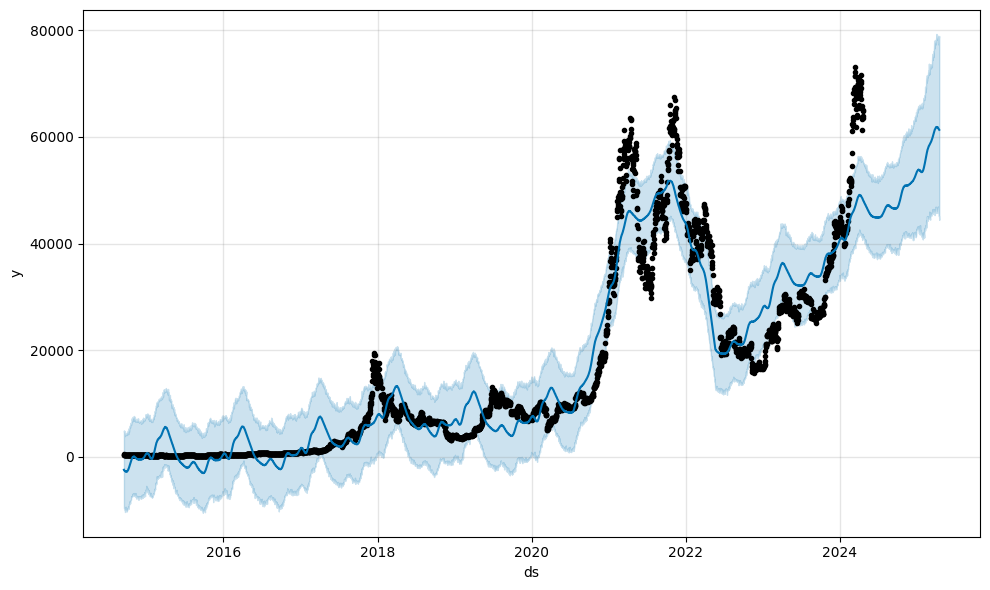

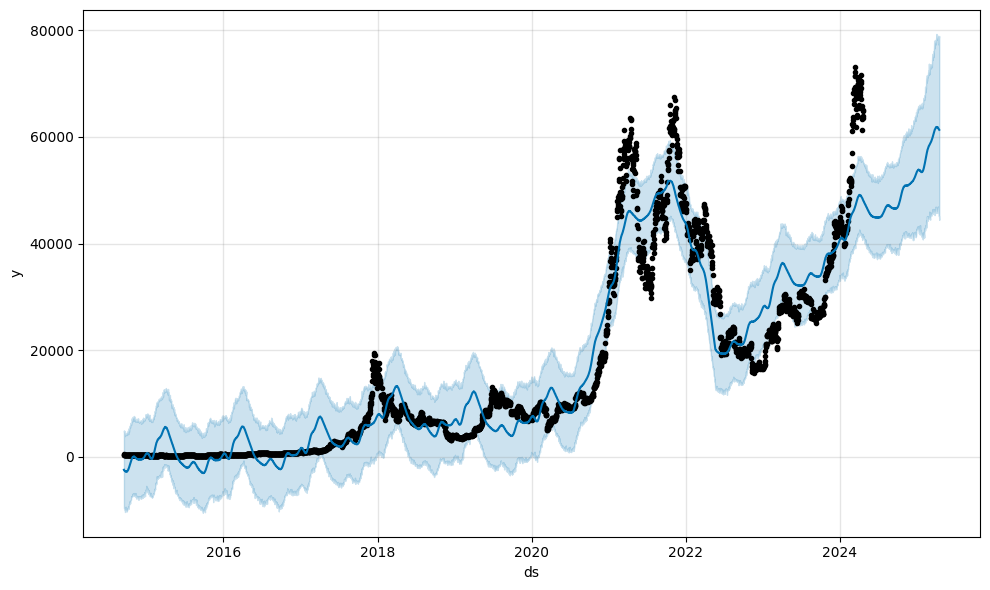

In [9]:
model.plot(guess)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

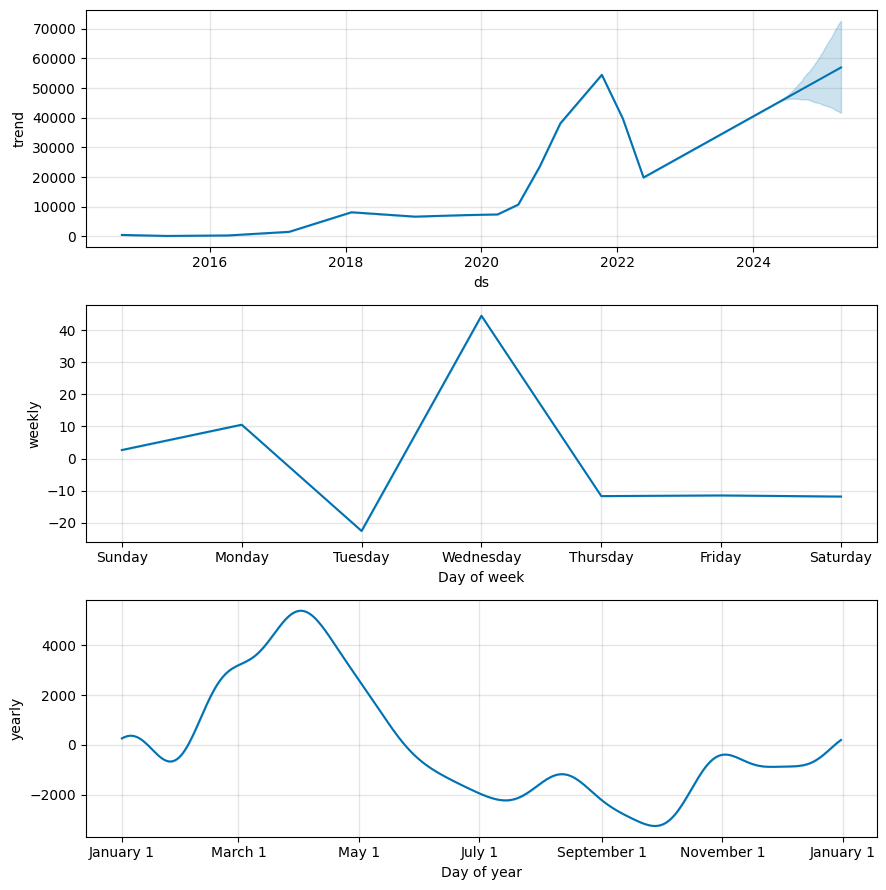

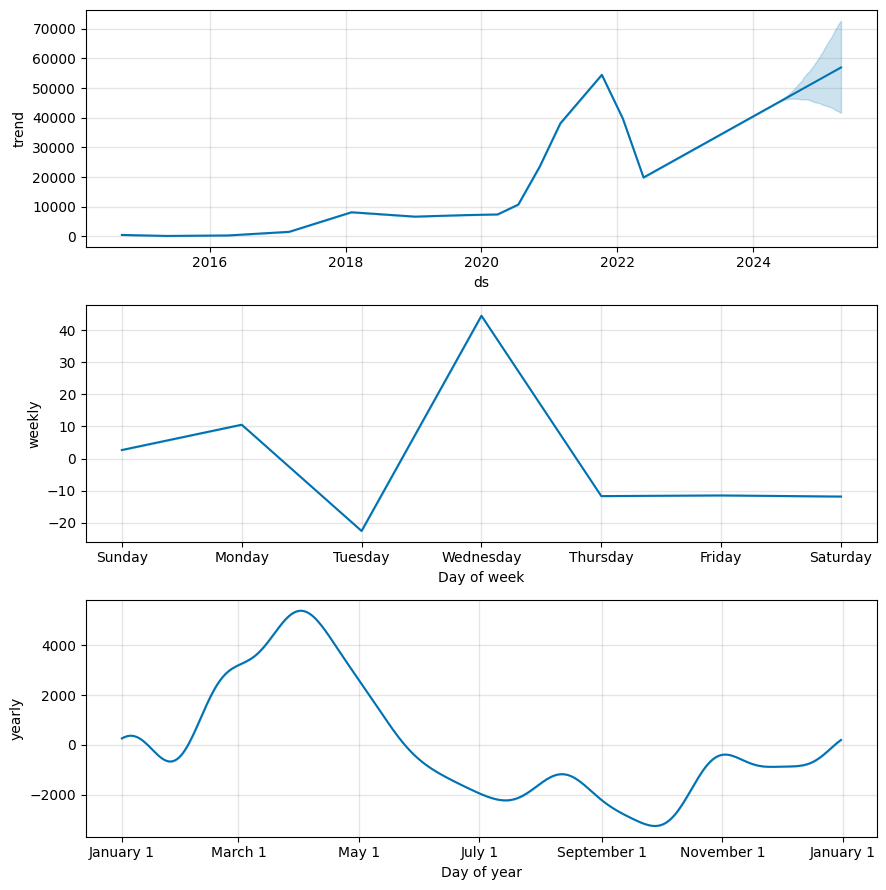

In [10]:
model.plot_components(guess)